In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ -5.91537512, -10.47259044],
       [ -1.2207946 ,   8.9412606 ],
       [ -8.55251716,  -0.94331934],
       ...,
       [ -5.0977822 ,  -7.67439275],
       [ -0.29310775,   6.70060011],
       [ -2.41184431,   7.09250909]])

In [4]:
y

array([2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2,
       0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0,
       2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1,
       2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0,

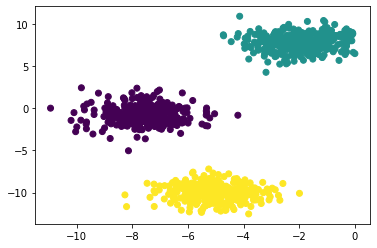

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
wcss

[1340.0000000000007,
 424.95015973791095,
 115.33148274308228,
 92.77017711262467,
 70.65944759222172,
 50.480563778771895,
 43.76914814023299,
 37.78651682526583,
 32.731467464806514,
 29.178581843245734]

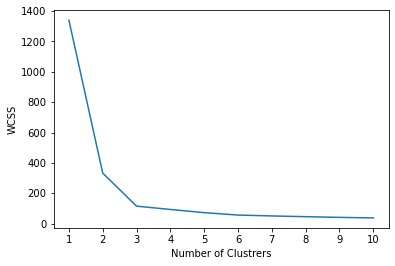

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [25]:
kmeans=KMeans(n_clusters=3,init="k-means++")
#k-means ++ initialize means centroids are far away from points

In [26]:
kmeans.fit_predict(X_train_scaled)

array([2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0,
       1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1,
       1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0,
       2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1,

In [27]:
y_pred=kmeans.predict(X_test_scaled)

In [28]:
y_pred

array([2, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2,
       0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1,
       2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1,

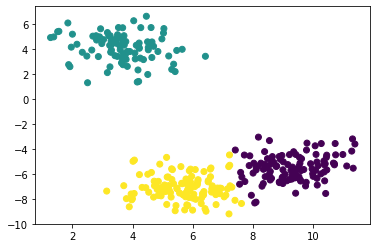

In [29]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [25]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [30]:
## kneelocator
!pip install kneed

In [31]:
from kneed import KneeLocator

In [32]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [33]:
kl.elbow

3

In [30]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [32]:
silhouette_coefficients

[0.5791208264052049,
 0.7345149600137074,
 0.590061277437689,
 0.46306511562346064,
 0.3194384017662996,
 0.3260433893207664,
 0.3295975251169475,
 0.33870715403767093,
 0.33711491411125977]

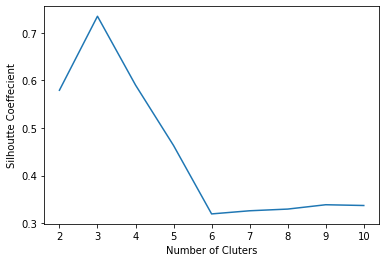

In [33]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()